##Introduction
**Self Organizing Maps (SOM)** or Kohenin’s map is a type of artificial neural network introduced by Teuvo Kohonen in the 1980s.

A SOM is an unsupervised learning algorithm trained using dimensionality reduction (typically two-dimensional), discretized representation of input space of the training samples, called a **map**. It differs from other ANN as they apply competitive learning and not the error-correction learning (like backpropagation with gradient descent). They use a neighborhood function to preserve the topological properties of the input space to reduce data by creating a spatially organized representation, and also helps to discover the correlation between data.

![Image](https://www.latentview.com/wp-content/uploads/2020/09/blog-5.jpg)

[Source](https://www.latentview.com/wp-content/uploads/2020/09/blog-5.jpg)


For more details. [visit this site](https://www.latentview.com/blog/self-organizing-maps/#:~:text=Self%20Organizing%20Maps%20(SOM)%20or,training%20samples%2C%20called%20a%20map.)

## Self Orgenization Map SOM

Here's a brief documentation for the classes, functions, and parameters in the provided Self-Organizing Map (SOM) implementation:

### `SOM` Class:

#### Constructor:
- `SOM(width, height, input_dim, learning_rate=0.5, sigma=None)`

   Parameters:
   - `width` (int): Width of the SOM grid.
   - `height` (int): Height of the SOM grid.
   - `input_dim` (int): Dimensionality of the input data.
   - `learning_rate` (float, optional): Learning rate for weight updates (default is 0.5).
   - `sigma` (float, optional): Initial neighborhood radius (default is calculated based on grid size).

#### Methods:

1. `train(data, epochs)`
   - Train the SOM with input data for a specified number of epochs.
   
   Parameters:
   - `data` (numpy.ndarray): Input data for training.
   - `epochs` (int): Number of training epochs.

2. `find_best_matching_unit(x)`
   - Find the Best Matching Unit (BMU) for a given input data point.
   
   Parameters:
   - `x` (numpy.ndarray): Input data point to find the BMU for.
   
   Returns:
   - (tuple): Coordinates (row, column) of the BMU in the SOM grid.

3. `update_weights(bmu, x, epoch)`
   - Update the weights of the SOM based on the BMU and input data point.
   
   Parameters:
   - `bmu` (tuple): Coordinates of the BMU in the SOM grid.
   - `x` (numpy.ndarray): Input data point.
   - `epoch` (int): Current training epoch.

### Example Usage:

1. Create an instance of the `SOM` class by specifying the SOM grid dimensions, input data dimension, learning rate, and initial neighborhood radius.

2. Train the SOM using the `train` method with your dataset and the number of training epochs.

3. Access the trained SOM weights using the `weights` attribute of the `SOM` instance.




In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [9]:
import numpy as np
import random

with tf.device('/device:GPU:0'):
  class SOM:
      def __init__(self, width, height, input_dim, learning_rate=0.5, sigma=None):
          self.width = width
          self.height = height
          self.input_dim = input_dim
          self.learning_rate = learning_rate
          self.sigma = max(width, height) / 2 if sigma is None else sigma
          self.weights = np.random.rand(width, height, input_dim)

      def train(self, data, epochs):
          for epoch in range(epochs):
              random.shuffle(data)
              for x in data:
                  bmu = self.find_best_matching_unit(x)
                  self.update_weights(bmu, x, epoch)

      def find_best_matching_unit(self, x):
          min_dist = np.linalg.norm(x - self.weights[0, 0])
          bmu = (0, 0)
          for i in range(self.width):
              for j in range(self.height):
                  dist = np.linalg.norm(x - self.weights[i, j])
                  if dist < min_dist:
                      min_dist = dist
                      bmu = (i, j)
          return bmu

      def update_weights(self, bmu, x, epoch):
          for i in range(self.width):
              for j in range(self.height):
                  w = self.weights[i, j]
                  w_dist = np.linalg.norm(np.array(bmu) - np.array([i, j]))
                  w_alpha = self.learning_rate * np.exp(-epoch / 1000)
                  w_sigma = self.sigma * np.exp(-epoch / 1000)
                  influence = np.exp(-(w_dist ** 2) / (2 * w_sigma ** 2))
                  self.weights[i, j] = w + w_alpha * influence * (x - w)

# Example usage:
data = np.random.rand(100, 2)  # Replace this with your dataset
som = SOM(10, 10, 2, learning_rate=0.5)
som.train(data, 100)

# Access the trained weights
trained_weights = som.weights
print(trained_weights)


[[[0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]]

 [[0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]]

 [[0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]]

 [[0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.28434401 0.0145294 ]
  [0.2

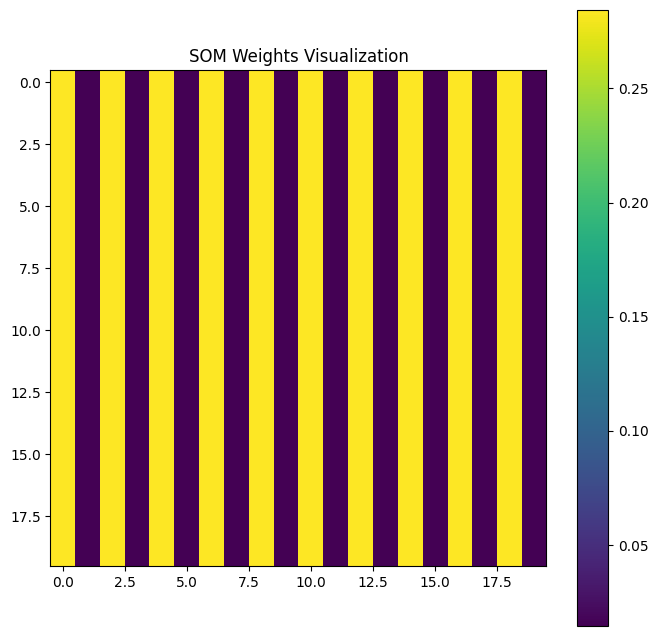

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a trained SOM named 'som' with weights
# Access the trained weights from the SOM instance
weights = som.weights

# Define the dimensions of the SOM grid
width, height, input_dim = weights.shape

# Create a grid for plotting
grid = np.zeros((width * input_dim, height * input_dim))

# Arrange the weights in the grid for visualization
for i in range(width):
    for j in range(height):
        grid[i * input_dim:(i + 1) * input_dim, j * input_dim:(j + 1) * input_dim] = weights[i, j]

# Create a plot of the weights
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='viridis')
plt.title("SOM Weights Visualization")
plt.colorbar()
plt.show()


### Application of the Self-Organizing Map (SOM) using pyhton prebuilt library called [**MiniSOM**](https://pypi.org/project/MiniSom/)

In [ ]:
# Install libraray using this command if not installed,
#!pip install minisom

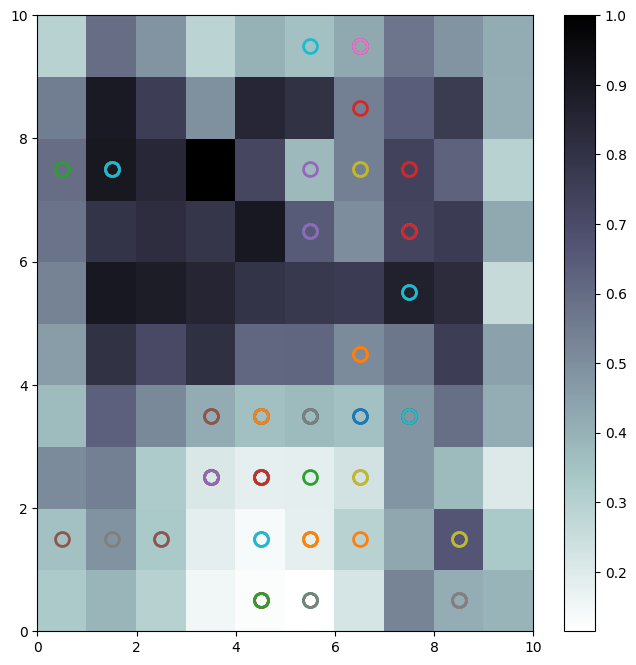

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Create a dataset (random example)
data = np.random.rand(100, 2)  # Replace this with your dataset

# Initialize a SOM
som = MiniSom(10, 10, 2, sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train_random(data, 100)  # Adjust the number of iterations as needed

# Plot the map
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Distance map
plt.colorbar()
for i, x in enumerate(data):
    winner = som.winner(x)
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'o', markerfacecolor='None', markersize=10, markeredgewidth=2)
plt.axis([0, 10, 0, 10])  # Set the axis limits based on your SOM size (10x10 in this case)
plt.show()
